In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)

from scipy.stats import mannwhitneyu

In [2]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

## Постановка задачи

Предсказать факт невыполнения кредитных обязательств. 

#### Описание датасета

* Home Ownership - домовладение
* Annual Income - годовой доход
* Years in current job - количество лет на текущем месте работы
* Tax Liens - налоговые обременения
* Number of Open Accounts - количество открытых счетов
* Years of Credit History - количество лет кредитной истории
* Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)
* Number of Credit Problems - количество проблем с кредитом
* Months since last delinquent - количество месяцев с последней просрочки платежа
* Bankruptcies - банкротства
* Purpose - цель кредита
* Term - срок кредита
* Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)
* Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)
* Monthly Debt - ежемесячный долг
* Credit Score - баллы кредитного рейтинга
* Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Загрузка данных

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
df_train.shape

(7500, 17)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [6]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [7]:
df_test.shape

(2500, 16)

In [8]:
df_train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

## Обзор данных

In [9]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

дисбаланс класссов

In [10]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


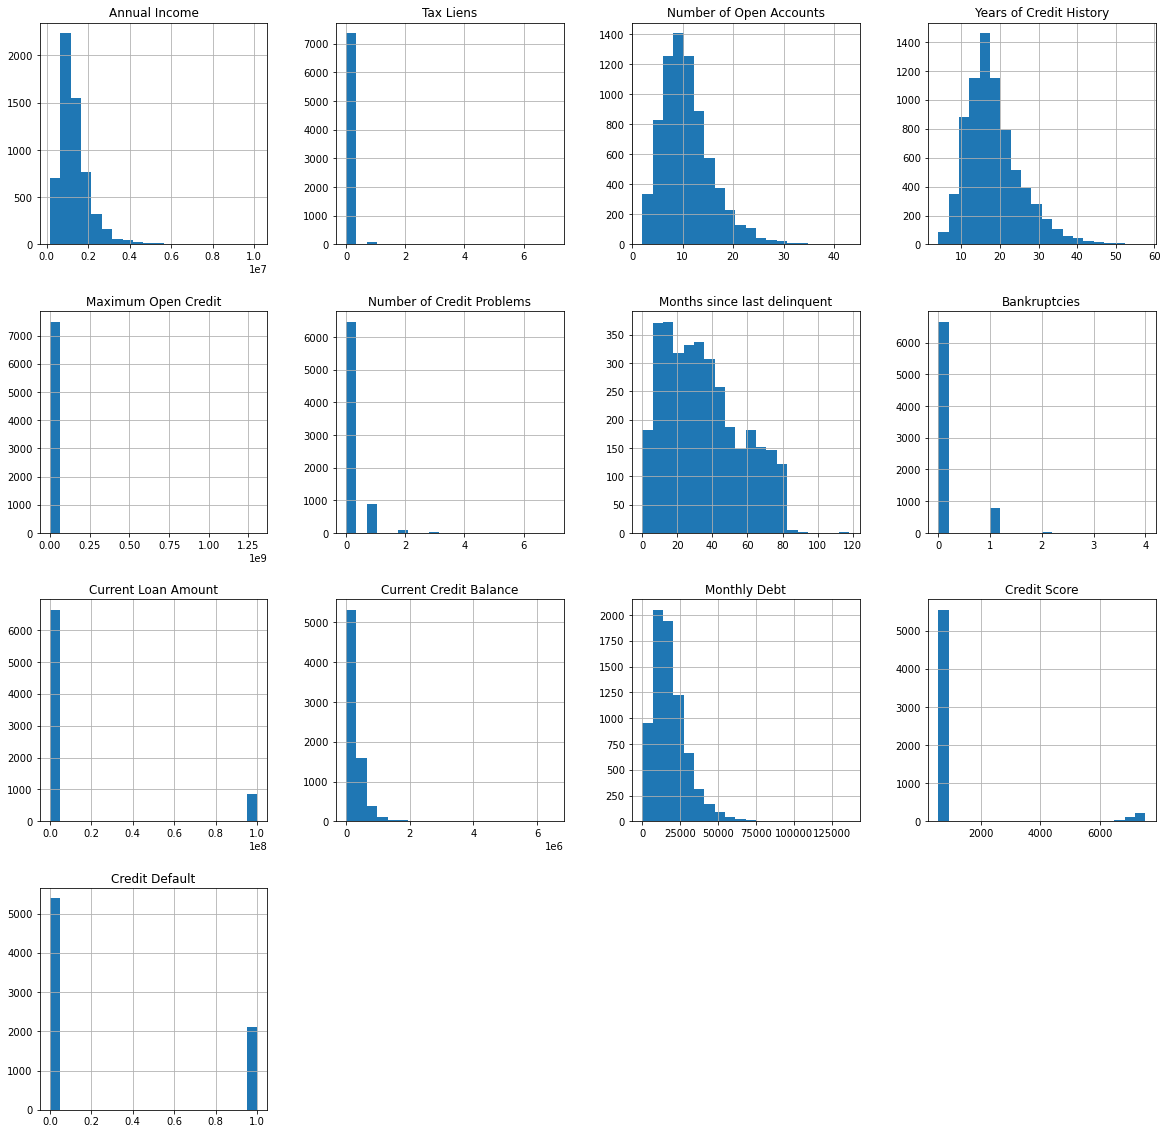

In [11]:
df_train.hist(bins = 20, figsize = (20, 20), grid=True)
plt.show()

In [12]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

Have Mortgage возможно это Home Mortgage

In [13]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()
NUM_FEATURE_NAMES = ['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']
CAT_FEATURE_NAMES = df_train.select_dtypes(include='object').columns.tolist() 

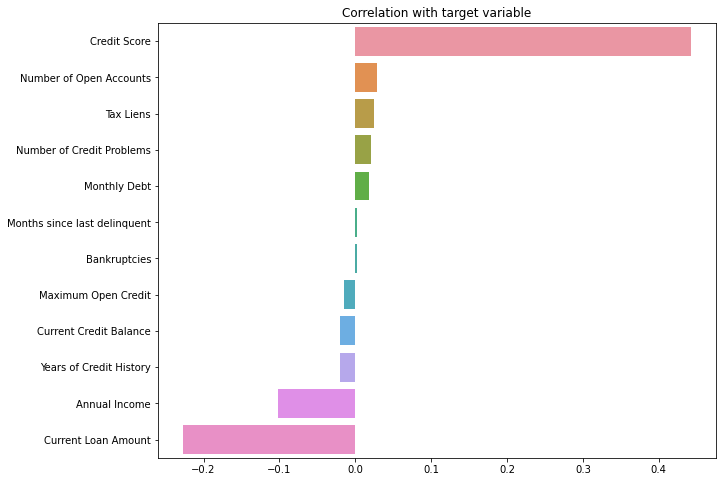

In [14]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

#### Проверим распределения вещественных признаков на трейне и тесте

Annual Income
MannwhitneyuResult(statistic=9362155.5, pvalue=0.45908193952511717)


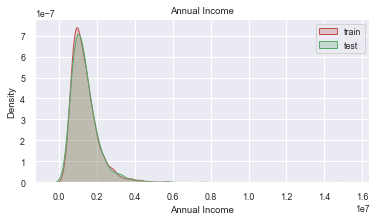

Tax Liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


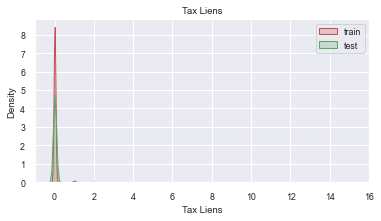

Number of Open Accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


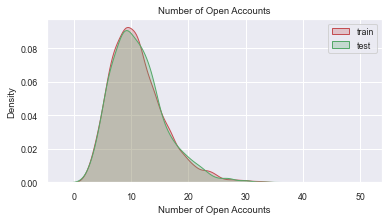

Years of Credit History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


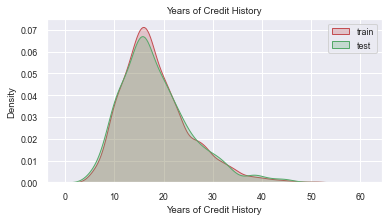

Maximum Open Credit
MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)


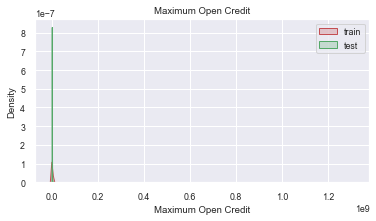

Number of Credit Problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


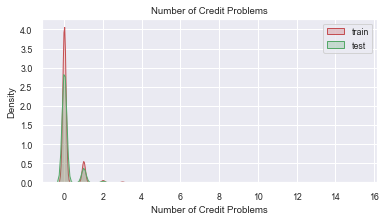

Months since last delinquent
MannwhitneyuResult(statistic=6974400.5, pvalue=1.712573746209761e-82)


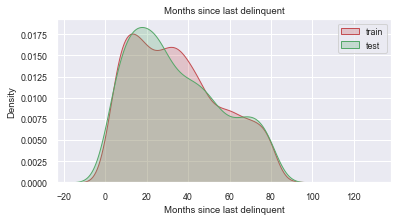

Bankruptcies
MannwhitneyuResult(statistic=9254231.0, pvalue=0.036681545859698156)


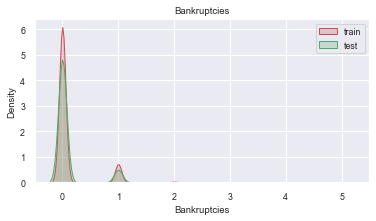

Current Loan Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


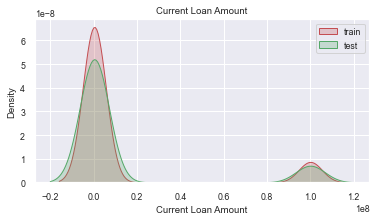

Current Credit Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


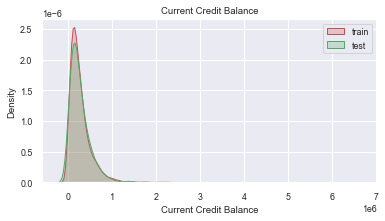

Monthly Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


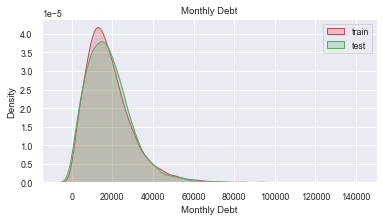

Credit Score
MannwhitneyuResult(statistic=9359581.5, pvalue=0.45091647518794764)


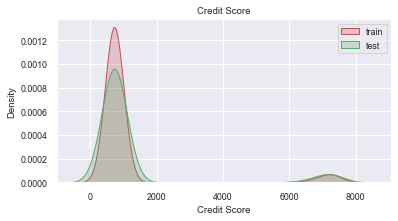

In [15]:
figsize = (6, 3)
for col in NUM_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(df_train[col], shade=True, label='train', color='r')
    sns.kdeplot(df_test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(df_train[col], df_test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

**Проверим распределения категориальных признаков на трейне и тесте**

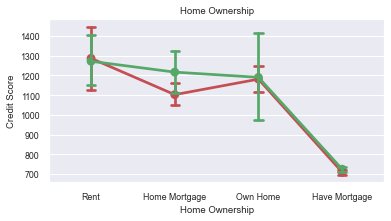

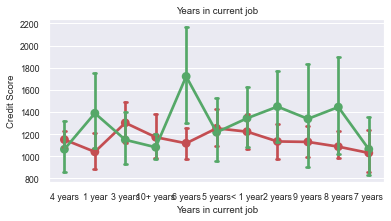

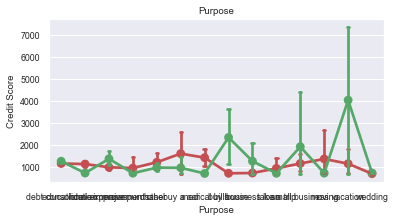

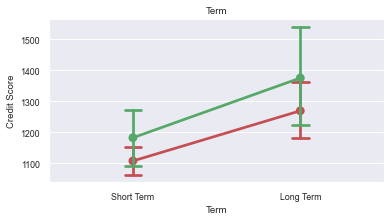

In [16]:
num_feature = 'Credit Score'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=df_train, capsize=.1, label='train', color='r')
    sns.pointplot(x=col, y=num_feature, data=df_test, capsize=.1, label='test', color='g')
    plt.title(col) 
    plt.show()

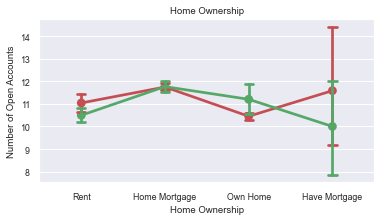

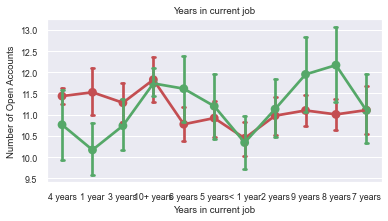

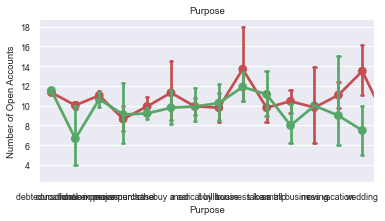

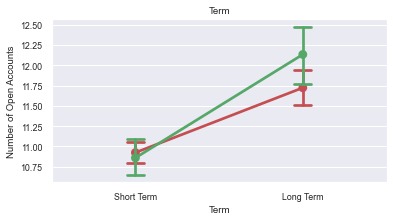

In [17]:
num_feature = 'Number of Open Accounts'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=df_train, capsize=.1, label='train', color='r')
    sns.pointplot(x=col, y=num_feature, data=df_test, capsize=.1, label='test', color='g')
    plt.title(col) 
    plt.show()

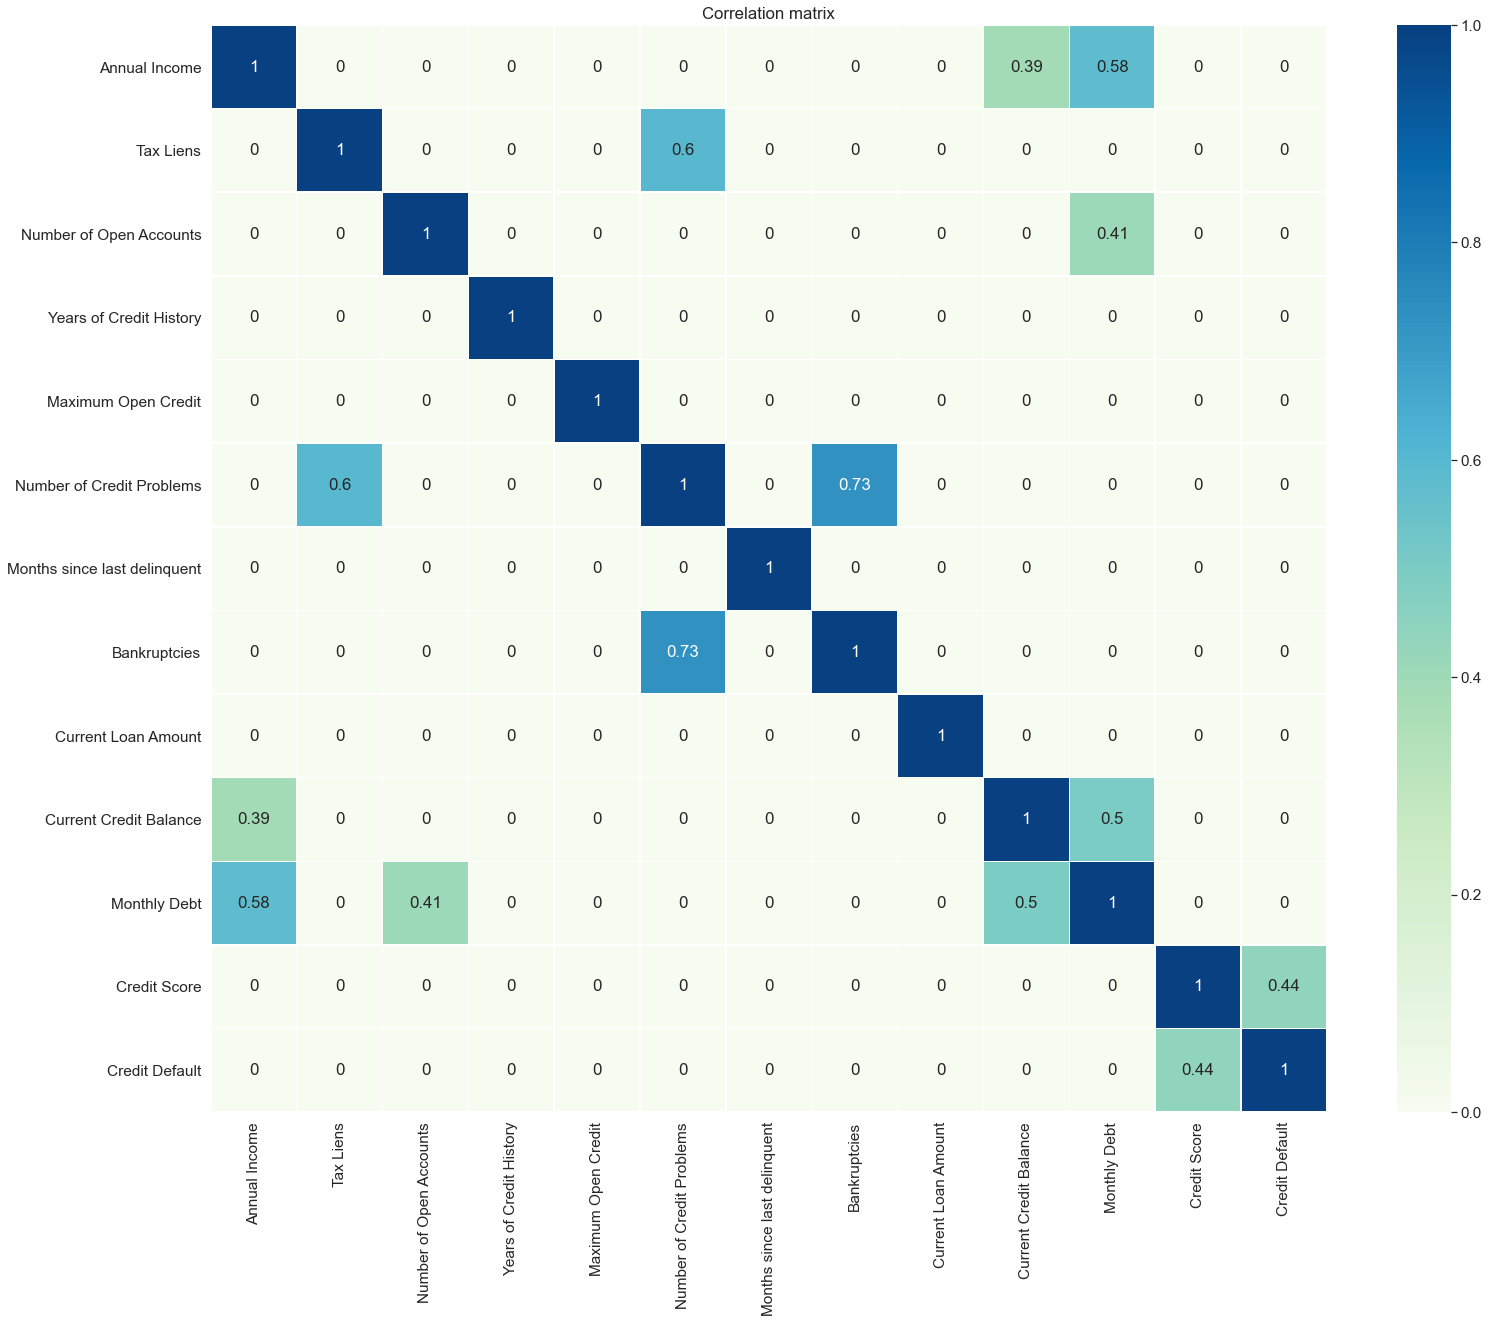

In [18]:
plt.figure(figsize=(25, 20))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

#### Обработка пропусков

In [19]:
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [20]:
df_train['Annual Income'].fillna(df_train['Annual Income'].median(), inplace=True)
df_test['Annual Income'].fillna(df_test['Annual Income'].median(), inplace=True)

In [21]:
df_train['Years in current job'].fillna(df_train['Years in current job'].mode().values[0], inplace=True)
df_test['Years in current job'].fillna(df_test['Years in current job'].mode().values[0], inplace=True)

In [22]:
df_train['Months since last delinquent'].fillna(0, inplace=True)
df_test['Months since last delinquent'].fillna(0, inplace=True)

In [23]:
df_train['Bankruptcies'].fillna(df_train['Bankruptcies'].median(), inplace=True)
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].median(), inplace=True)

In [24]:
df_train['Credit Score'].fillna(df_train['Credit Score'].median(), inplace=True)
df_test['Credit Score'].fillna(df_test['Credit Score'].median(), inplace=True)

#### Обработка выбросов

In [25]:
df_train.loc[df_train['Credit Score'] > 850, 'Credit Score'].count()

400

In [26]:
df_test.loc[df_test['Credit Score'] > 850, 'Credit Score'].count()

160

In [27]:
df_train.loc[df_train['Credit Score'] > 850, 'Credit Score'] = df_train['Credit Score'] / 10
df_train.loc[df_train['Credit Score'] > 850, 'Credit Score'].count()

0

In [28]:
df_test.loc[df_train['Credit Score'] > 850, 'Credit Score'] = df_test['Credit Score'] / 10
df_test.loc[df_train['Credit Score'] > 850, 'Credit Score'].count()

0

In [29]:
df_train['Maximum Open Credit'].describe()

count    7.500000e+03
mean     9.451537e+05
std      1.602622e+07
min      0.000000e+00
25%      2.792295e+05
50%      4.781590e+05
75%      7.935015e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64

In [30]:
df_train.nlargest(10, 'Maximum Open Credit')

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
617,Home Mortgage,1168386.0,3 years,0.0,13.0,27.5,1.304726e+09,0.0,0.0,0.0,debt consolidation,Short Term,529892.0,1126814.0,5492.0,731.0,0
44,Have Mortgage,1334256.0,10+ years,0.0,17.0,15.4,3.800523e+08,1.0,35.0,0.0,take a trip,Short Term,33110.0,656450.0,34357.0,729.0,0
2617,Home Mortgage,3217802.0,10+ years,0.0,12.0,35.5,2.655129e+08,0.0,0.0,0.0,other,Short Term,50116.0,1834450.0,20272.0,750.0,0
2023,Rent,1342825.0,10+ years,0.0,12.0,16.3,5.756256e+07,0.0,0.0,0.0,other,Short Term,166826.0,944547.0,9176.0,749.0,0
2763,Home Mortgage,3377440.0,10+ years,0.0,11.0,23.2,4.092389e+07,0.0,59.0,0.0,home improvements,Short Term,99999999.0,1908550.0,5770.0,743.0,0
7026,Home Mortgage,3312365.0,5 years,0.0,13.0,25.3,2.640700e+07,0.0,50.0,0.0,home improvements,Long Term,99999999.0,2440246.0,39196.0,745.0,0
4769,Home Mortgage,3739960.0,9 years,0.0,7.0,22.8,2.634333e+07,0.0,0.0,0.0,home improvements,Short Term,757834.0,6506797.0,38023.0,703.0,0
5523,Home Mortgage,1520304.0,10+ years,0.0,21.0,35.5,2.137243e+07,0.0,0.0,0.0,other,Long Term,99999999.0,1975012.0,12555.0,728.0,0
5731,Home Mortgage,1475198.0,8 years,0.0,10.0,24.9,1.928043e+07,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,1132286.0,17543.0,751.0,0
3170,Home Mortgage,2226230.0,10+ years,0.0,20.0,19.0,1.868381e+07,0.0,0.0,0.0,buy a car,Short Term,111892.0,2355867.0,17123.0,750.0,0


In [31]:
df_train['Maximum Open Credit'].value_counts()

0.0          65
319110.0      5
334796.0      3
358732.0      3
323312.0      3
             ..
235642.0      1
1435456.0     1
397078.0      1
537680.0      1
1516482.0     1
Name: Maximum Open Credit, Length: 6963, dtype: int64

In [32]:
df_train['Maximum Open Credit'].sort_values().unique()

array([0.00000000e+00, 4.33400000e+03, 6.55600000e+03, ...,
       2.65512874e+08, 3.80052288e+08, 1.30472617e+09])

In [33]:
df_train['Maximum Open Credit. Outlier'] = 0
df_train.loc[df_train['Maximum Open Credit'] > 99999999.0, 'Maximum Open Credit Outlier'] = 1
df_train.loc[df_train['Maximum Open Credit'] > 99999999.0, 'Maximum Open Credit'] = 99999999.0
df_test['Maximum Open Credit. Outlier'] = 0
df_test.loc[df_test['Maximum Open Credit'] > 99999999.0, 'Maximum Open Credit Outlier'] = 1
df_test.loc[df_test['Maximum Open Credit'] > 99999999.0, 'Maximum Open Credit'] = 99999999.0

In [34]:
df_train['Current Loan Amount. Outlier'] = 0
CLM_condition = df_train['Current Loan Amount'] >= 99999999.0
df_train.loc[CLM_condition, 'Current Loan Amount. Outlier'] = 1
df_train.loc[CLM_condition, 'Current Loan Amount'] = df_train['Current Loan Amount'].median()
df_test['Current Loan Amount. Outlier'] = 0
CLM_condition = df_test['Current Loan Amount'] >= 99999999.0
df_test.loc[CLM_condition, 'Current Loan Amount. Outlier'] = 1
df_test.loc[CLM_condition, 'Current Loan Amount'] = df_test['Current Loan Amount'].median()

#### Обработка object значений

In [35]:
df_train['Term'] = df_train['Term'].replace({'Short Term':0, 'Long Term':1})
df_test['Term'] = df_test['Term'].replace({'Short Term':0, 'Long Term':1})

In [36]:
df_train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

In [37]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Home Ownership'])], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Home Ownership'])], axis=1)

In [38]:
df_train['Years in current job'] = df_train['Years in current job'].map({'< 1 year':0, 
                                                                       '1 year':0, 
                                                                       '2 years':0, 
                                                                       '3 years':0, 
                                                                       '4 years':1, 
                                                                       '5 years':1, 
                                                                       '6 years':1, 
                                                                       '7 years':2,
                                                                       '8 years':2,
                                                                       '9 years':2,
                                                                       '10+ years':3})
df_test['Years in current job'] = df_test['Years in current job'].map({'< 1 year':0, 
                                                                       '1 year':0, 
                                                                       '2 years':0, 
                                                                       '3 years':0, 
                                                                       '4 years':1, 
                                                                       '5 years':1, 
                                                                       '6 years':1, 
                                                                       '7 years':2,
                                                                       '8 years':2,
                                                                       '9 years':2,
                                                                       '10+ years':3})

In [39]:
def credit_score_to_cat(X):
    bins = [300, 579, 669, 739, 799, 850]
    X['Credit Score Cat'] = pd.cut(X['Credit Score'], bins=bins, labels=False)
    
    X['Credit Score Cat'].fillna(-1, inplace=True)
    return X

In [40]:
df_train = credit_score_to_cat(df_train)
df_test = credit_score_to_cat(df_test)

In [41]:
df_train.loc[df_train['Tax Liens'] > 0, 'Tax Liens'] = 1
df_test.loc[df_test['Tax Liens'] > 0, 'Tax Liens'] = 1

In [42]:
df_train.loc[df_train['Number of Credit Problems'] > 0, 'Number of Credit Problems'] = 1
df_test.loc[df_test['Number of Credit Problems'] > 0, 'Number of Credit Problems'] = 1

In [43]:
df_train.loc[df_train['Bankruptcies'] > 0, 'Bankruptcies'] = 1
df_test.loc[df_test['Bankruptcies'] > 0, 'Bankruptcies'] = 1

In [44]:
df_train.loc[(df_train['Purpose'] == 'debt consolidation') | (df_train['Purpose'] == 'other') | (df_train['Purpose'] == 'home improvements'), 'Purpose'] = 0
df_train.loc[df_train['Purpose']!=0, 'Purpose'] = 1
df_test.loc[(df_test['Purpose'] == 'debt consolidation') | (df_test['Purpose'] == 'other') | (df_test['Purpose'] == 'home improvements'), 'Purpose'] = 0
df_test.loc[df_test['Purpose']!=0, 'Purpose'] = 1


In [45]:
df_train['Purpose'] = df_train['Purpose'].astype('int64')
df_test['Purpose'] = df_test['Purpose'].astype('int64')

In [46]:
df_copy = df_train.copy()
df_test_copy = df_test.copy()

In [47]:
df_copy = df_copy.drop(columns=['Home Ownership','Monthly Debt', 'Credit Default'])
df_test_copy = df_test_copy.drop(columns=['Home Ownership','Monthly Debt'])

### Построение и обучение модели

In [48]:
X = df_copy
y = df_train['Credit Default']

In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42, stratify=y)
display(y_train.value_counts(normalize=True), y_valid.value_counts(normalize=True))

0    0.718209
1    0.281791
Name: Credit Default, dtype: float64

0    0.718384
1    0.281616
Name: Credit Default, dtype: float64

In [50]:
disbalance = y_train.value_counts()[0] / y_train.value_counts()[1]
disbalance

2.5487288135593222

In [51]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [52]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [53]:
# !pip install catboost

In [54]:
import catboost as catb

In [55]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=42,
                                     class_weights=[1, disbalance]
                                     )
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_valid, y_train, y_valid)


TRAIN

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3609
           1       0.67      0.93      0.78      1416

    accuracy                           0.85      5025
   macro avg       0.82      0.87      0.83      5025
weighted avg       0.88      0.85      0.86      5025

TEST

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1778
           1       0.42      0.59      0.49       697

    accuracy                           0.65      2475
   macro avg       0.61      0.63      0.61      2475
weighted avg       0.70      0.65      0.67      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1203  575
1                285  412


In [66]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21,
                                     class_weights=[1, disbalance],
                                     eval_metric='F1'
#                                      early_stopping_rounds=20,
#                                      use_best_model=True,
#                                      custom_metric=['Precision', 'Recall']
                                    )
model_catb.fit(X_train, y_train, plot=True, eval_set=(X_valid, y_valid))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [67]:
model_catb.best_score_

{'learn': {'Logloss': 0.3156114285226584, 'F1': 0.934460054001159},
 'validation': {'Logloss': 0.3161114356500813, 'F1': 0.9290355750556625}}

In [68]:
evaluate_preds(model_catb, X_train, X_valid, y_train, y_valid)

TRAIN

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      5387
           1       0.79      0.97      0.87      2113

    accuracy                           0.92      7500
   macro avg       0.89      0.93      0.90      7500
weighted avg       0.93      0.92      0.92      7500

TEST

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1778
           1       0.77      0.96      0.86       697

    accuracy                           0.91      2475
   macro avg       0.88      0.93      0.90      2475
weighted avg       0.92      0.91      0.91      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1583  195
1                 26  671


In [74]:
frozen_params = {
     'class_weights':[1, disbalance], 
     'silent':True,
     'random_state':21,
     'eval_metric':'F1',
     'early_stopping_rounds':20
}
model_catb = catb.CatBoostClassifier(**frozen_params)

In [75]:
params = {'iterations':[50, 200, 500, 700, 1500],
          'max_depth':[3, 5, 7]}

In [76]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

In [77]:
grid_search = model_catb.grid_search(params, X_train, y_train, cv=cv, stratified=True, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7006012834
bestIteration = 3

0:	loss: 0.7006013	best: 0.7006013 (0)	total: 78.4ms	remaining: 1.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7006012834
bestIteration = 3

1:	loss: 0.7006013	best: 0.7006013 (0)	total: 135ms	remaining: 878ms
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7006012834
bestIteration = 3

2:	loss: 0.7006013	best: 0.7006013 (0)	total: 190ms	remaining: 761ms
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7006012834
bestIteration = 3

3:	loss: 0.7006013	best: 0.7006013 (0)	total: 246ms	remaining: 676ms
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7006012834
bestIteration = 3

4:	loss: 0.7006013	best: 0.7006013 (0)	total: 315ms	remaining: 629ms
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6798112245
bestIteration = 17

5:	loss: 0.6798112	best: 0.7006013 (0)	total: 453ms	remaining: 679

In [78]:
grid_search

{'params': {'depth': 3, 'iterations': 50},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43],
              'test-F1-mean': [0.5843341077405692,
               0.585304087678730

In [79]:
pd.DataFrame(grid_search['cv_results']).sort_values('test-F1-mean', ascending=False).head()

,iterations,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
7,7,0.691626,0.005239,0.693927,0.000905,0.649766,0.001621,0.649295,0.001849
9,9,0.691609,0.011022,0.694047,0.004330,0.643994,0.000453,0.643519,0.001883
8,8,0.691041,0.009537,0.695021,0.004458,0.647195,0.000548,0.646694,0.002050
14,14,0.690433,0.010177,0.691615,0.003488,0.636779,0.000416,0.635971,0.002171
16,16,0.689827,0.009283,0.691639,0.005916,0.634528,0.001278,0.633547,0.003056


In [81]:
evaluate_preds(model_catb, X_train, X_valid, y_train, y_valid)

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.62      0.73      5387
           1       0.44      0.77      0.56      2113

    accuracy                           0.66      7500
   macro avg       0.66      0.70      0.64      7500
weighted avg       0.75      0.66      0.68      7500

TEST

              precision    recall  f1-score   support

           0       0.88      0.63      0.73      1778
           1       0.45      0.77      0.57       697

    accuracy                           0.67      2475
   macro avg       0.66      0.70      0.65      2475
weighted avg       0.76      0.67      0.69      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1126  652
1                160  537


In [85]:
%%time

final_model = catb.CatBoostClassifier(**frozen_params, iterations=200, max_depth=7)
final_model.fit(X_train, y_train, plot=True, eval_set=(X_valid, y_valid))

evaluate_preds(final_model, X_train, X_valid, y_train, y_valid)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      5387
           1       0.64      0.92      0.76      2113

    accuracy                           0.83      7500
   macro avg       0.80      0.86      0.82      7500
weighted avg       0.87      0.83      0.84      7500

TEST

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1778
           1       0.64      0.91      0.76       697

    accuracy                           0.83      2475
   macro avg       0.80      0.86      0.81      2475
weighted avg       0.87      0.83      0.84      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1425  353
1                 60  637
CPU times: user 1.24 s, sys: 486 ms, total: 1.73 s
Wall time: 885 ms


In [86]:
X_train = df_copy
y_train = df_train['Credit Default']
X_test = df_test_copy

In [87]:
final_model = catb.CatBoostClassifier(silent=True, max_depth=5,
                                      iterations=20, random_state=28,
                                     class_weights=[1, disbalance],
                                     eval_metric='F1',
                                     early_stopping_rounds=20,
                                     )

In [88]:
final_model.fit(X_train, y_train)

In [89]:
y_test_preds = final_model.predict(X_test)

In [90]:
result = pd.DataFrame()
result['Id'] = df_test.index
result['Credit Default'] = pd.Series(y_test_preds)

In [91]:
result.to_csv('Antanishyna_prediction_2.csv', index=False)
result.values

array([[   0,    1],
       [   1,    1],
       [   2,    0],
       ...,
       [2497,    1],
       [2498,    0],
       [2499,    1]])